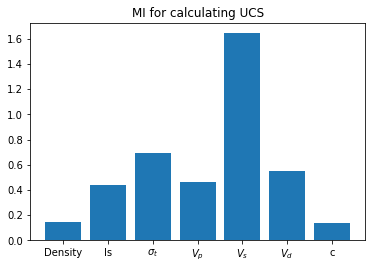

MI index for UCS: 
 [0.14738175 0.43559428 0.69509839 0.46638416 1.64292132 0.5520777
 0.14174873]


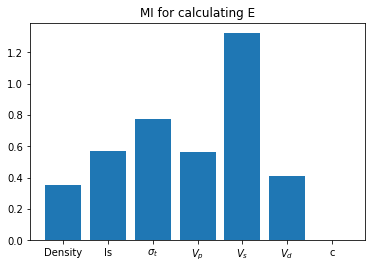

MI index for E: 
 [0.35652887 0.57014107 0.77475968 0.56488264 1.322069   0.41078031
 0.        ]
Train test shapes - UCS: 
 (33, 4) (6, 4)
Root Mean Square Error:
 0.232
Root Mean Square Error:
 0.14


In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression

from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score

# %% loading the data

file_path = r"geo.xlsx"
f = pd.read_excel(file_path)

features = f.iloc[:,1:8]

scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)

# %% Targets in the data

UCS = f.iloc[:,9]
E = f.iloc[:, 10]

# label_encoder = LabelEncoder()
# y1 = label_encoder.fit_transform(pd.cut(f['UCS (MPa)2'], 4, retbins=True)[0])
# y2 = label_encoder.fit_transform(pd.cut(f['Ed (GPa)2'], 3, retbins=True)[0])
# mi_score = mutual_info_classif(x,f['y1'])

# %% Feature selection based on Mutual Information (MI) - UCS

mi_score_UCS = mutual_info_regression(scaled_features, UCS)

p = ['Density', 'Is', '$\sigma_{t}$', '$V_{p}$', '$V_{s}$', '$V_{d}$', 'c']
k = mi_score_UCS

plt.bar(p,k)
plt.xticks(p)
plt.title('MI for calculating UCS')
plt.show()

print('MI index for UCS: \n', mi_score_UCS) 

# %% Feature selection based on Mutual Information (MI) - E

mi_score_E = mutual_info_regression(scaled_features, E)

p = ['Density', 'Is', '$\sigma_{t}$', '$V_{p}$', '$V_{s}$', '$V_{d}$', 'c']
k = mi_score_E

plt.bar(p,k)
plt.xticks(p)
plt.title('MI for calculating E')
plt.show()

print('MI index for E: \n', mi_score_E) 

#%% UCS and E prediction based on the used feature selection strategy

UCS_dataset = f[['VS (m/s)', 'σt (MPa)', 'νd', 'UCS (MPa)2']]
E_dataset = f[['VS (m/s)', 'σt (MPa)', 'VP (m/s)', 'Is(50)', 'Ed (GPa)2']]

# %% train test split 15 percent
train_UCS, test_UCS = train_test_split(UCS_dataset, test_size = 0.15)
train_E, test_E = train_test_split(E_dataset, test_size = 0.15)

scale_train = MinMaxScaler()

# scaling train
UCS_train = scale_train.fit_transform(train_UCS)
E_train = scale_train.fit_transform(train_E)

# scaling test
UCS_test = scale_train.fit_transform(test_UCS)
E_test = scale_train.fit_transform(test_E)

print('Train test shapes - UCS: \n', UCS_train.shape, UCS_test.shape)

# %% Build The Model - UCS

model_UCS = AdaBoostRegressor()
# fit the model on the whole dataset
model_UCS.fit(UCS_train[:, :2], UCS_train[:, 3])
# make a single prediction
UCS_prediction = model_UCS.predict(UCS_test[:, :2])

# Root Mean Squared Error - UCS
MSE_UCS = np.square(np.subtract(UCS_test[:, 3], UCS_prediction)).mean() 
RMSE_UCS = math.sqrt(MSE_UCS)
print("Root Mean Square Error:\n", round(RMSE_UCS, 3))

# %% Build The Model - E

model_E = AdaBoostRegressor()
# fit the model on the whole dataset
model_E.fit(E_train[:, :3], E_train[:, 4])
# make a single prediction
E_prediction = model_E.predict(E_test[:, :3])

# Root Mean Squared Error - E
MSE_E = np.square(np.subtract(E_test[:, 4], E_prediction)).mean() 
RMSE_E = math.sqrt(MSE_E)
print("Root Mean Square Error:\n", round(RMSE_E, 3))